In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
url = "http://bit.ly/w-data"
student_data= pd.read_csv(url)
print("DataSet")
student_data

DataSet


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
student_data.shape

(25, 2)

In [6]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

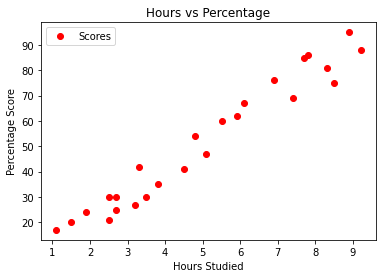

In [8]:
student_data.plot(x='Hours',y='Scores',style='ro')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [9]:
x=student_data.iloc[:,:-1].values
y=student_data.iloc[:,1].values

In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [14]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [15]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [16]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training Complete")

Training Complete


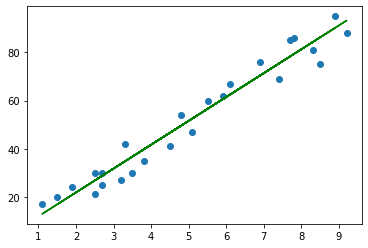

In [25]:
line=regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line,color='green');
plt.show()

In [27]:
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [28]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [29]:
hours=9.25
own_pred=regressor.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"predict Score={own_pred[0]}")

No of Hours = 9.25
predict Score=93.69173248737538


In [30]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error : 4.183859899002975


In [31]:
print('Mean Squared Error :', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error : 21.5987693072174
